In [1]:
#pip install textblob
#pip install spacy
#pip install afinn
#pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [11]:
# File paths
cleaned_tweet_file=os.path.join("..","Resources","outputData","tweetCleanData.csv")
pred_data_file = os.path.join("..","Resources","outputData","tweetPredData.csv")

In [4]:
# Load tweet csv file
tweet_df= pd.read_csv(cleaned_tweet_file)

In [5]:
# Display results - we will be using predTweet column to predict the sentiment
tweet_df.head()

,TweetID,Date,Matched Keywords,User,Source,Followers,Friends,Favorite,Tweet,predTweet,CleanedTweet
0,1290598653770575872,08/04/2020,Trump,genadamedia,GenadaMedia,1685.0,1642.0,0.0,Trump: TikTok Must Sell Its American Operation...,trump tiktok must sell its american operations...,"['trump', 'tiktok', 'american', 'over']"
1,1290598652847816706,08/04/2020,Trump,Carolin64234118,Twitter for Android,0.0,41.0,0.0,@richardmarx I need whatever the reporter is t...,need whatever the reporter taking keep his coo...,"['whaten', 'report', 'take', 'exercise', 'pati..."
2,1290598651966951424,08/04/2020,Trump,soulb4time,Twitter Web App,42.0,117.0,0.0,@GOPChairwoman President Trump & the RN keep s...,president trump and the rec keep sending mail ...,"['preside', 'trump', 'send', 'decease', 'husba..."
3,1290598649626599424,08/04/2020,Trump,Jan714,Twitter Web App,39.0,120.0,0.0,"@realDonaldTrump \n""Donald Trump dumped $400 m...",donald trump dumped million into his clubs in ...,"['donald', 'trump', 'dump', 'million', 'club',..."
4,1290598646740848640,08/04/2020,Trump,jocfanaccount,Twitter for iPhone,659.0,730.0,0.0,This is how every single journalist should be ...,this how every single journalist should be tal...,"['every', 'single', 'journalist', 'talk', 'eve..."


### Method 1: VADER Sentiment Analysis:
- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the MIT License[http://choosealicense.com/] 

In [6]:
# import SentimentIntensityAnalyzer class from vaderSentiment.vaderSentiment module. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def getSentiment(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer oject gives a sentiment dictionary which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return "Positive"
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
  
    else : 
        return "Neutral"
  

In [7]:
# Get predictions
tweet_df['Prediction']=tweet_df['predTweet'].apply(str).apply(lambda x: getSentiment(x))

In [8]:
# Display size for df
pd.set_option('display.max_colwidth', 150)

In [9]:
# Display results
tweet_df[['Matched Keywords','predTweet','Prediction']]

,Matched Keywords,predTweet,Prediction
0,Trump,trump tiktok must sell its american operations by sept pay the,Negative
1,Trump,need whatever the reporter taking keep his cool what an exercise in patience trump stammering like year old caught climbing chair reach cookies,Positive
2,Trump,president trump and the rec keep sending mail my deceased husband rip who trying scam who,Negative
3,Trump,donald trump dumped million into his clubs in aberdeen and turnberry now lawmakers in edinburgh want investigate him for money laundering we are f...,Negative
4,Trump,this how every single journalist should be talking him call him his crap every time dont let him lie you trump gets so flustered because hes not u...,Negative
...,...,...,...
68578,Biden,we know joe bien love the chinese communities party,Positive
68579,Trump,like trump but this was already in obama care,Positive
68580,Biden,there person of sound mind in the usa democrat or republican who thinks joe bien mentally up the job of leading deeply divided nation coping with ...,Negative
68581,Trump,opinion we are only beginning suffer the consequences of trumps failures the washington post,Negative


In [12]:
# Save data
tweet_df.to_csv(pred_data_file,index=False)

In [13]:
TrumpTweets=tweet_df[tweet_df['Matched Keywords']=='Trump']
BidenTweets =tweet_df[tweet_df['Matched Keywords']=='Biden']

In [14]:
TrumpCount=len(TrumpTweets['Prediction'])
BidenCount=len(BidenTweets['Prediction'])

In [15]:
# Function to caluclate % of sentiments
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [16]:
# Intital counter for sentiment
positive=0
negative=0
neutral=0

In [17]:
def getSentiments(tag,tweets,count):
    # reset counter for sentiment
    positive=0
    negative=0
    neutral=0
    positive_per=0
    neutral_per=0
    negative_per=0
    
    # Loop through tweets and get sentiment polarity
    for pred in tweets:
        
        if(pred =='Positive'):
            positive+=1
        elif(pred =='Negative'):
            negative+=1
        else:
            neutral+=1
            
    
    positive_per = format(percentage(positive,count),'.2f')
    neutral_per = format(percentage(neutral,count),'.2f')
    negative_per = format(percentage(negative,count),'.2f')

    # Preapre labels
    labels =[f'Positive ({positive:,} tweets) [{str(positive_per)}%]',
             f'Neutral ({neutral:,} tweets) [{str(neutral_per)}%]',
             f'Negative ({negative:,} tweets) [{str(negative_per)}%]']
    # Sizes
    sizes=[positive,neutral,negative]
    # Colors
    colors=['yellowgreen','gold','red']
    
    #Explode
    explode = (0.1, 0, 0)  # explode 1st slice
    
    fig = plt.figure(figsize=[8,8])
    ax = fig.add_subplot(111)
    
    # Draw pie chart to show sentiments for the tweets
    #patches,text=plt.pie(sizes,colors=colors,startangle=90)
    plt.pie(sizes, labels=labels, colors=colors,explode=explode,
            shadow=True, startangle=140, autopct='%1.0f%%', labeldistance=1.2)
    plt.title("How people on reacting on " + tag + " by analyzing " + str(count) + " Tweets")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

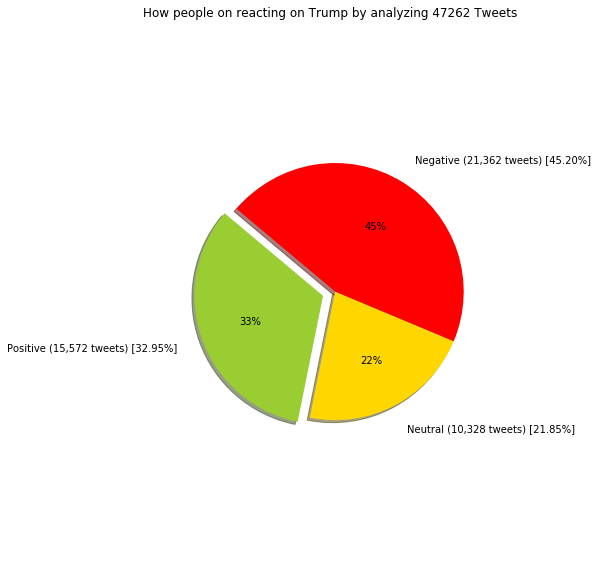

In [18]:
getSentiments("Trump", TrumpTweets['Prediction'],TrumpCount)

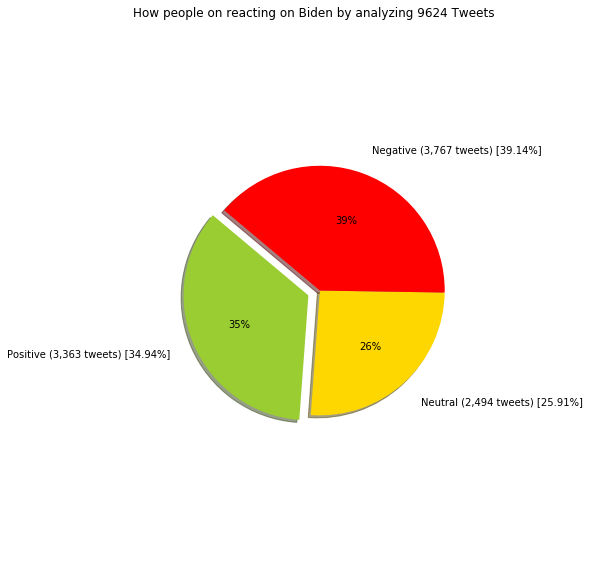

In [19]:
getSentiments("Biden", BidenTweets['Prediction'],BidenCount)

#### We can get a good idea of general sentiment statistics across different tweet categories. Looks like the average sentiment is  negative for Trump and reasonably positive for Biden! 

In [20]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [21]:
tweet_df['encodePrediction'] = labelencoder.fit_transform(tweet_df['Prediction'])

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


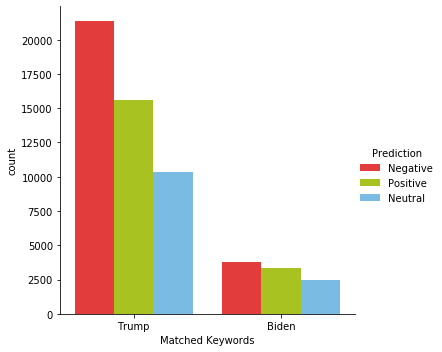

In [22]:
fc = sns.factorplot(x="Matched Keywords", hue="Prediction", 
                    data=tweet_df, kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

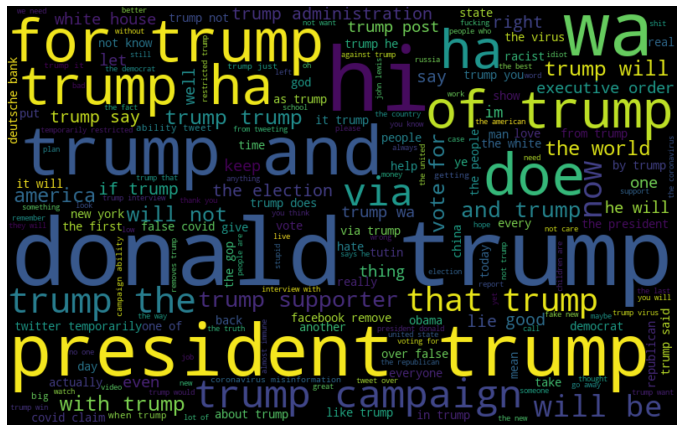

In [23]:
all_words = ' '.join([text for text in TrumpTweets['predTweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

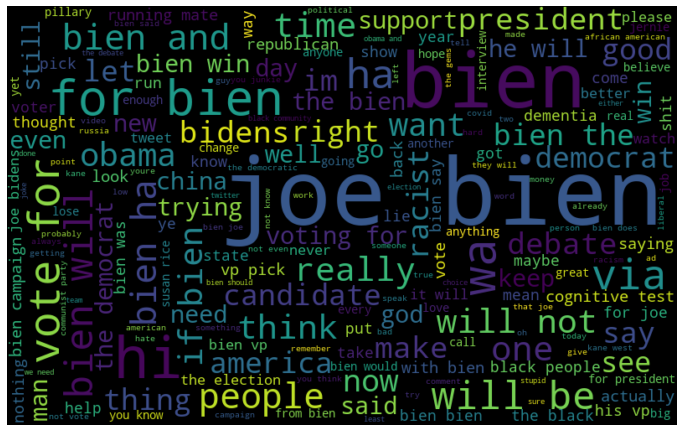

In [24]:
all_words = ' '.join([text for text in BidenTweets['predTweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()